In [ ]:
pip install networkx

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite


# **PART ONE**

## **Question 1**

In [ ]:
def assign_jobs(tasks, volunteers):
    # Create a bipartite graph
    G = nx.Graph()

    # Add nodes from the left set (tasks)
    G.add_nodes_from(tasks, bipartite=0, task=True)

    # Add nodes from the right set (volunteers)
    volunteers_list = [volunteer for volunteers_for_task in volunteers.values() for volunteer in volunteers_for_task]
    G.add_nodes_from(volunteers_list, bipartite=1,  volunteer=True)

    # Add edges based on the given information
    edges = [(task, volunteer) for task, volunteers_for_task in volunteers.items() for volunteer in volunteers_for_task]
    G.add_edges_from(edges)

    # Find the maximum matching using Hopcroft-Karp algorithm
    matching = nx.bipartite.maximum_matching(G)

    # Display the assignments
    for volunteer, task in matching.items():
          if volunteer not in tasks:
            print(f"{volunteer} assigned ---> {task}")


    return G


# Given tasks and volunteers

tasks = ['Receiving Guests', 'Serving Refreshments', 'Sitting Arrangements', 'Campus Tour', 'Entertaining Guests']
volunteers = {
    'Receiving Guests': ["Deogratias"],
    'Serving Refreshments': ["Judith", "Diane", "Deogratias"],
    'Sitting Arrangements': ["Judith", "Diane", "Deogratias", "Erastus"],
    'Campus Tour': ["Diane", "John", "Erastus"],
    'Entertaining Guests': ["Deogratias", "Erastus"]
}

matching_graph = assign_jobs(tasks, volunteers)

John assigned ---> Campus Tour
Deogratias assigned ---> Receiving Guests
Diane assigned ---> Serving Refreshments
Judith assigned ---> Sitting Arrangements
Erastus assigned ---> Entertaining Guests


**Plot the Bipartite Graph using the Results from Question 1**


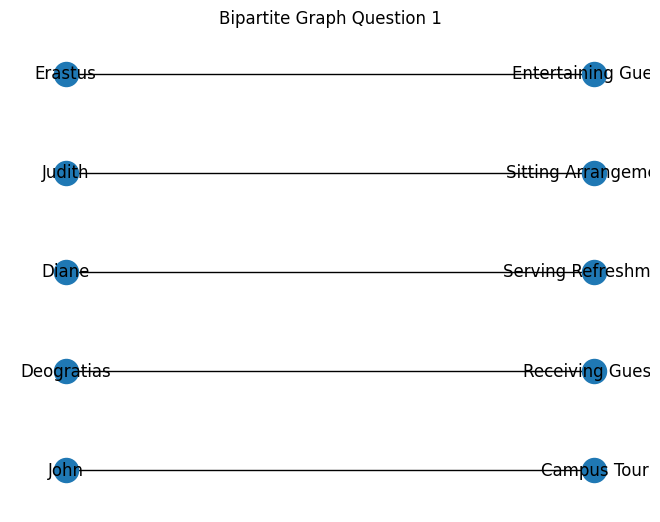

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

""""
John assigned ---> Campus Tour
Deogratias assigned ---> Receiving Guests
Diane assigned ---> Serving Refreshments
Judith assigned ---> Sitting Arrangements
Erastus assigned ---> Entertaining Guests
"""


# Assignments
assignments = {
    "John": "Campus Tour",
    "Deogratias": "Receiving Guests",
    "Diane": "Serving Refreshments",
    "Judith": "Sitting Arrangements",
    "Erastus": "Entertaining Guests",
}

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for person, task in assignments.items():
    B.add_node(person, bipartite=0)  # 0 represents the set of people
    B.add_node(task, bipartite=1)    # 1 represents the set of tasks
    B.add_edge(person, task)

# Plot the bipartite graph
pos = {node: (0, i) for i, node in enumerate(assignments.keys())}
pos.update({node: (1, i) for i, node in enumerate(assignments.values())})
nx.draw(B, pos, with_labels=True,  font_weight='regular')
plt.title('Bipartite Graph Question 1')
plt.show()

**Explanation**

John: Campus Tour : John is assigned to the task of Campus Tour.

Deogratias: Receiving Guests : Deogratias is assigned to the task of Receiving Guests.

Diane: Serving Refreshments : Diane is assigned to the task of Serving Refreshments.

Judith: Sitting Arrangements : Judith is assigned to the task of Sitting Arrangements.

Erastus: Entertaining Guests : Erastus is assigned to the task of Entertaining Guests.

These assignments optimize the matching of volunteers to tasks using a bipartite graph algorithm.

## **Question 2**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def assign_tasks(tasks, volunteers, capacities):
    # Create a directed graph
    G = nx.DiGraph()

    # Add source and sink nodes
    source = 'source'
    sink = 'sink'
    G.add_node(source, demand=-len(tasks))  # Source has demand = -number of tasks
    G.add_node(sink, demand=len(tasks))    # Sink has demand = number of tasks

    # Add nodes for tasks and volunteers
    G.add_nodes_from(tasks, demand=0)
    G.add_nodes_from(volunteers, demand=0)

    # Add edges based on capacities
    for volunteer, capacity in capacities.items():
        G.add_edge(source, volunteer, capacity=capacity)

    for task in tasks:
        G.add_edge(task, sink, capacity=1)

    for volunteer, tasks_for_volunteer in volunteers.items():
        for task in tasks_for_volunteer:
            G.add_edge(volunteer, task, capacity=1)

    # Find the maximum flow using Ford-Fulkerson algorithm
    flow_value, flow_dict = nx.maximum_flow(G, source, sink)

    # Print the optimal assignment
    for volunteer, tasks_for_volunteer in flow_dict.items():
        for task, flow in tasks_for_volunteer.items():
            if flow == 1 and task in tasks:
                print(f"{volunteer} assigned -> {tasks[task]}")

# Given tasks and volunteers
tasks = {
    1: "Receiving guests",
    2: "Serving refreshments",
    3: "Sitting arrangements",
    4: "Campus tour",
    5: "Entertaining guests"
}
volunteers = {
    'Deogratias': [1, 2, 3 ,5],
    'Judith': [2, 3],
    'Diane': [2, 3, 4],
    'John': [4],
    'Erastus': [3, 4, 5]
}

capacities = {
    'source': 1000,  # Source has infinite capacity
    'Deogratias': 3,
    'Judith': 1,
    'Diane': 2,
    'John': 1,
    'Erastus': 2,
    'sink': 1000     # Sink has infinite capacity
}
print('Optimal Mapping/Assignments of the Volunteers to Tasks \n')
# Call the function to get the optimal assignment and the flow network
assign_tasks(tasks, volunteers, capacities)

Optimal Mapping/Assignments of the Volunteers to Tasks 

Deogratias assigned -> Receiving guests
Deogratias assigned -> Entertaining guests
Judith assigned -> Sitting arrangements
Diane assigned -> Serving refreshments
Diane assigned -> Campus tour


**Plot the Bipartite Graph using the Results from Question 2**




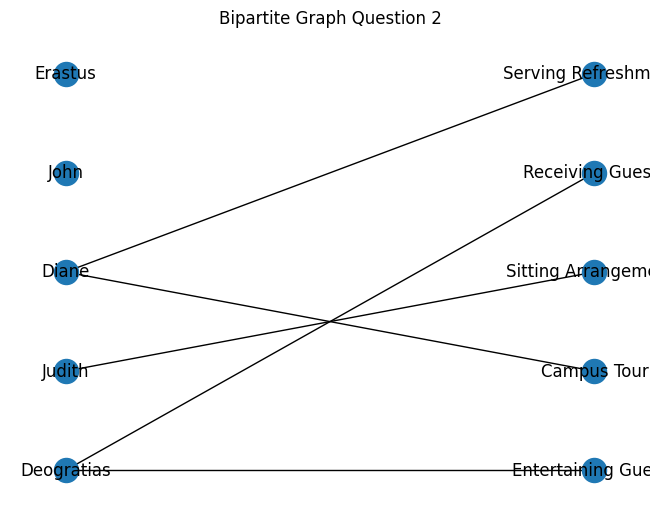

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

""""
THE RESULTS
Deogratias assigned -> Receiving guests
Deogratias assigned -> Entertaining guests
Judith assigned -> Sitting arrangements
Diane assigned -> Serving refreshments
Diane assigned -> Campus tour

"""
# Assignments
assignments = {
    "Deogratias": ["Receiving Guests", "Entertaining Guests"],
    "Judith": ["Sitting Arrangements"],
    "Diane": ["Serving Refreshments", "Campus Tour"],
    "John": [],  # John has no assignment
    "Erastus": [],  # Erastus has no assignment
}

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for person, tasks in assignments.items():
    B.add_node(person, bipartite=0)  # 0 represents the set of people
    for task in tasks:
        B.add_node(task, bipartite=1)  # 1 represents the set of tasks
        B.add_edge(person, task)

# Plot the bipartite graph
pos = {node: (0, i) for i, node in enumerate(assignments.keys())}
pos.update({node: (1, i) for i, node in enumerate(set(task for tasks in assignments.values() for task in tasks))})
nx.draw(B, pos, with_labels=True, font_weight='regular')
plt.title('Bipartite Graph Question 2')
plt.show()


Let's break down the output

**Volunteers to Tasks:**

* Deogratias assigned -> Receiving guests
* Deogratias assigned -> Entertaining guests
* Judith assigned -> Sitting arrangements
* Diane assigned -> Serving refreshments
* Diane assigned -> Campus tour

These edges represent the assignment of tasks to volunteers. It indicates which volunteer is assigned to each task.

The output demonstrates an optimal assignment where each task is assigned to one volunteer, and volunteers are assigned tasks according to their capacities. The capacities are respected, meaning that no volunteer is assigned more tasks than they can handle.

**Some Volunteers Don't have Assignment**

In the context of the problem formulation, where each volunteer has a capacity (maximum number of tasks they can take on), it is indeed possible that some volunteers may not be assigned any tasks. This is because the optimal assignment aims to maximize the overall task completion while respecting the capacities of individual volunteers.

In your specific output:

From the output, it seems like volunteers John and Erastus are not assigned any tasks. This is likely because, based on the capacities  specified, there are not enough tasks to fully utilize the capacities of all volunteers. The algorithm optimally assigns tasks to volunteers while respecting their capacities, and in some cases, this may result in not every volunteer receiving a task.

## **Question 3**

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

def allocate_tasks(tasks, volunteers, edges, capacities):
    # Create a bipartite graph
    G = nx.Graph()

    # Add nodes for tasks and volunteers
    G.add_nodes_from(tasks, bipartite=0)  # Task nodes
    G.add_nodes_from(volunteers, bipartite=1)  # Volunteer nodes

    # Add edges based on volunteers' preferences
    G.add_edges_from(edges)

    # Add capacities to the graph
    nx.set_edge_attributes(G, capacities, "capacity")

    # Find the maximum matching
    max_matching = bipartite.maximum_matching(G)

    print('Optimal Mapping/Assignments of the Volunteers to Tasks \n')
    for task, volunteer in max_matching.items():
      if volunteer not in tasks:
            print(f"{volunteer} assigned ---> {tasks[task]}")  # Print the full task name

# Task and volunteer data
tasks = {
    1: "Receiving guests",
    2: "Serving refreshments",
    3: "Sitting arrangements",
    4: "Campus tour",
    5: "Entertaining guests"
}

volunteers = ["Deogratias", "Judith", "Diane", "Erastus", "John"]

# Define the edges based on the given scenario
edges = [
    (1, "Deogratias"), (2, "Judith"), (2, "Diane"), (2, "Deogratias"),
    (3, "Judith"), (3, "Diane"), (3, "Deogratias"), (3, "Erastus"),
    (4, "Diane"), (4, "John"), (4, "Erastus"),
    (5, "Deogratias"), (5, "Erastus")
]

# Define capacities for each edge and the volunteers who volunteered for each task
capacities = {
    (1, "Deogratias"): 5,
    (2, "Judith"): 1,
    (2, "Diane"): 1,
    (2, "Deogratias"): 1,
    (3, "Judith"): 2,
    (3, "Diane"): 2,
    (3, "Deogratias"): 2,
    (3, "Erastus"): 2,
    (4, "Diane"): 1,
    (4, "John"): 1,
    (4, "Erastus"): 1,
    (5, "Deogratias"): 3,
    (5, "Erastus"): 3
}

# Call the function and print the results
optimal_allocation = allocate_tasks(tasks, volunteers, edges, capacities)


Optimal Mapping/Assignments of the Volunteers to Tasks 

Deogratias assigned ---> Receiving guests
Judith assigned ---> Serving refreshments
Diane assigned ---> Sitting arrangements
John assigned ---> Campus tour
Erastus assigned ---> Entertaining guests


**Plot the Bipartite Graph using the Results from Question 3***


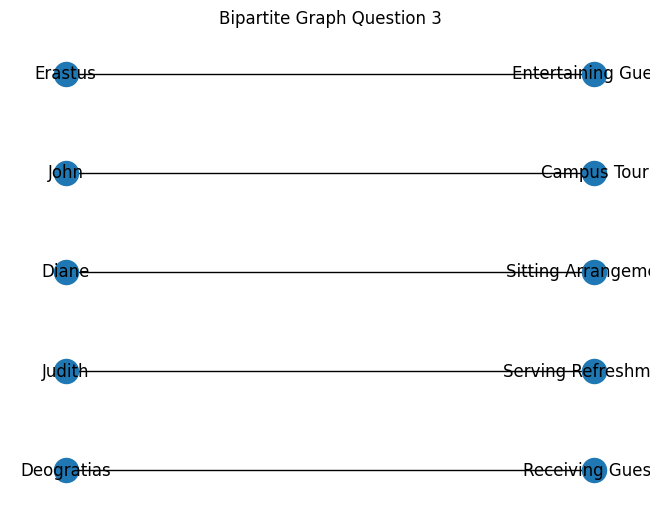

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assignments
"""
THE RESULTS
Deogratias assigned ---> Receiving guests
Judith assigned ---> Serving refreshments
Diane assigned ---> Sitting arrangements
John assigned ---> Campus tour
Erastus assigned ---> Entertaining guests
"""


assignments = {
    "Deogratias": "Receiving Guests",
    "Judith": "Serving Refreshments",
    "Diane": "Sitting Arrangements",
    "John": "Campus Tour",
    "Erastus": "Entertaining Guests",
}

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for person, task in assignments.items():
    B.add_node(person, bipartite=0)  # 0 represents the set of people
    B.add_node(task, bipartite=1)    # 1 represents the set of tasks
    B.add_edge(person, task)

# Plot the bipartite graph
pos = {node: (0, i) for i, node in enumerate(assignments.keys())}
pos.update({node: (1, i) for i, node in enumerate(assignments.values())})
nx.draw(B, pos, with_labels=True, font_weight='regular')
plt.title('Bipartite Graph Question 3')
plt.show()


**Explanation**

Each volunteer is assigned to a task, and this assignment is based on the maximum flow in the bipartite graph representing the task assignment problem. Let me break down the explanation for each assignment:

Deogratias assigned to Receiving guests:
Deogratias is assigned to "Receiving guests" because this task can be done by up to 5 volunteers (as specified in the task capacities).And she was the only one who volunteered for it

Judith assigned to Serving refreshments:

Judith is assigned to "Serving refreshments" because this task can be done by only one volunteer (as specified in the task capacities).
Diane assigned to Sitting arrangements:

Diane is assigned to "Sitting arrangements" because this task can be done by up to 2 volunteers (as specified in the task capacities).
John assigned to Campus tour:

John is assigned to "Campus tour" because this task can only be done by one volunteer (as specified in the task capacities).
Erastus assigned to Entertaining guests:

Erastus is assigned to "Entertaining guests" because this task can be done by up to three volunteers (as specified in the task capacities).
The algorithm optimally assigns volunteers to tasks while respecting the given capacities for each task. The Ford-Fulkerson algorithm is used to find the maximum flow in the bipartite graph, ensuring that each task is assigned to at most the specified number of volunteers. The result is an optimal mapping that maximizes the overall task assignments.

## **Question 4**

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define tasks and volunteers with their capacities
tasks = {'Receiving guests': 5, 'Serving refreshments': 1, 'Sitting arrangements': 2, 'Campus tour': 1, 'Entertaining guests': 3}
volunteers = {'Deogratias': 3, 'Judith': 1, 'Diane': 2, 'John': 1, 'Erastus': 2}

# Add nodes to the graph
G.add_nodes_from(tasks)
G.add_nodes_from(volunteers)

# Add edges with capacities based on volunteer capabilities
edges_and_capacities = [
    ('Receiving guests', 'Deogratias'),
    ('Serving refreshments', 'Judith'),
    ('Serving refreshments', 'Diane'),
    ('Serving refreshments', 'Deogratias'),
    ('Sitting arrangements', 'Judith'),
    ('Sitting arrangements', 'Diane'),
    ('Sitting arrangements', 'Deogratias'),
    ('Sitting arrangements', 'Erastus'),
    ('Campus tour', 'Diane'),
    ('Campus tour', 'John'),
    ('Campus tour', 'Erastus'),
    ('Entertaining guests', 'Deogratias'),
    ('Entertaining guests', 'Erastus')
]

for edge in edges_and_capacities:
    G.add_edge(*edge, capacity=float('inf'))

# Add a source and a sink
source_node = 'source'
sink_node = 'sink'
G.add_node(source_node)
G.add_node(sink_node)

# Connect source to tasks and sink to volunteers with their capacities
for task, capacity in tasks.items():
    G.add_edge(source_node, task, capacity=capacity)

for volunteer, capacity in volunteers.items():
    G.add_edge(volunteer, sink_node, capacity=capacity)

# Find the maximum flow using the Ford-Fulkerson algorithm
flow_value, flow_dict = nx.maximum_flow(G, source_node, sink_node)

# Display the optimal mapping
for task, volunteers in flow_dict.items():
    if task != source_node and task != sink_node:
        for volunteer, flow in volunteers.items():
            if flow > 0  and task in tasks:
                print(f'{task} assigned to ---> "{volunteer}"')


Receiving guests assigned to ---> "Deogratias"
Serving refreshments assigned to ---> "Diane"
Sitting arrangements assigned to ---> "Judith"
Sitting arrangements assigned to ---> "Diane"
Campus tour assigned to ---> "John"
Entertaining guests assigned to ---> "Erastus"


**Plot the Bipartite Graph using the Results from Question 4***



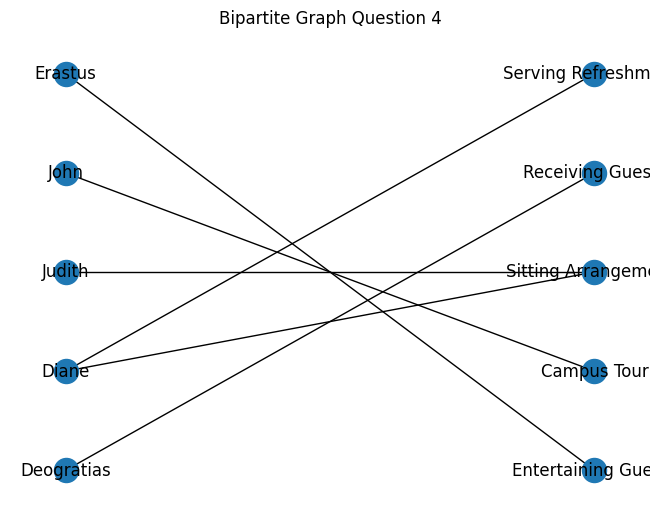

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

"""
THE RESULTS
Receiving guests assigned to ---> "Deogratias"
Serving refreshments assigned to ---> "Diane"
Sitting arrangements assigned to ---> "Judith"
Sitting arrangements assigned to ---> "Diane"
Campus tour assigned to ---> "John"
Entertaining guests assigned to ---> "Erastus"
"""
# Assignments
assignments = {
    "Deogratias": ["Receiving Guests"],
    "Diane": ["Serving Refreshments", "Sitting Arrangements"],
    "Judith": ["Sitting Arrangements"],
    "John": ["Campus Tour"],
    "Erastus": ["Entertaining Guests"],
}

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for person, tasks in assignments.items():
    B.add_node(person, bipartite=0)  # 0 represents the set of people
    for task in tasks:
        B.add_node(task, bipartite=1)    # 1 represents the set of tasks
        B.add_edge(person, task)

# Plot the bipartite graph
pos = {node: (0, i) for i, node in enumerate(assignments.keys())}
pos.update({node: (1, i) for i, node in enumerate(set(task for tasks in assignments.values() for task in tasks))})
nx.draw(B, pos, with_labels=True, font_weight='regular')
plt.title('Bipartite Graph Question 4')
plt.show()


The optimal mapping follows the constraints  specified, such as the maximum number of tasks each volunteer can do and the capacities of each task. Judith, for example, can only do one task, so she is assigned "Sitting arrangements" once. Diane, with a capacity of 2, is assigned "Sitting arrangements" twice. Deogratias, with a capacity of 3, takes on "Receiving guests," and "Serving refreshments," and "Sitting arrangements." John and Erastus are assigned tasks based on their capacities.

## **Question 5**

In [ ]:
import networkx as nx
from collections import defaultdict

def allocate_tasks(volunteers, tasks):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for volunteers and tasks
    G.add_nodes_from(['source'] + list(volunteers.keys()) + list(tasks.keys()) + ['sink'])

    # Connect source to volunteers with their capacities
    for volunteer, capacity in volunteers.items():
        G.add_edge('source', volunteer, capacity=capacity)

    # Connect tasks to sink with their capacities
    for task, capacity in tasks.items():
        G.add_edge(task, 'sink', capacity=capacity)

    # Connect volunteers to tasks with capacities (each volunteer can do each task once)
    for volunteer in volunteers:
        for task in tasks:
            G.add_edge(volunteer, task, capacity=1)

    # Find the maximum flow
    max_flow_value, max_flow_dict = nx.maximum_flow(G, 'source', 'sink')

    # Output the final allocation
    allocation = defaultdict(list)
    for volunteer, tasks_allocation in max_flow_dict.items():
        for task, flow in tasks_allocation.items():
            if flow > 0 and task != 'sink':
                allocation[volunteer].append(task)

    return allocation

# Example usage
volunteers = {
    'Judith': 1,
    'Diane': 2,
    'Deogratias': 3,
    'John': 1,
    'Erastus': 2
}

tasks = {
    'Receiving guests': 5,
    'Serving refreshments': 1,
    'Sitting arrangements': 2,
    'Campus tour': 3,  # Three sessions of campus tour
    'Entertaining guests': 2  # Two sessions of entertaining guests
}

allocation_result = allocate_tasks(volunteers, tasks)

# Print the result
for volunteer, tasks_assigned in allocation_result.items():
    print(f"{volunteer} assigned tasks: {', '.join(tasks_assigned)}")


source assigned tasks: Judith, Diane, Deogratias, John, Erastus
Judith assigned tasks: Receiving guests
Diane assigned tasks: Receiving guests, Sitting arrangements
Deogratias assigned tasks: Receiving guests, Sitting arrangements, Campus tour
John assigned tasks: Receiving guests
Erastus assigned tasks: Receiving guests, Serving refreshments


**Plot the MAX Flow Graph using the Results from Question 5**

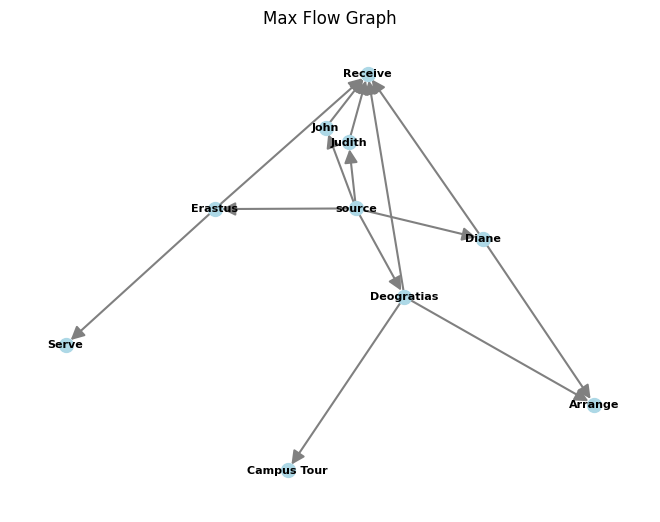

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assignments
assignments = {
    "Judith": ["Receive"],
    "Diane": ["Receive", "Arrange"],
    "Deogratias": ["Receive", "Arrange", "Campus Tour"],
    "John": ["Receive"],
    "Erastus": ["Receive", "Serve"],
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with capacities
G.add_node('source', pos=(0, 0))
for person, tasks in assignments.items():
    G.add_edge('source', person)
    for task in tasks:
        G.add_edge(person, task)

# Plot the max flow graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='lightblue', font_size=8, edge_color='gray', width=1.5, arrowsize=20)
plt.title('Max Flow Graph')
plt.show()


# **PART TWO**

## **Task 1: Formulating the Route for Least Cost**

Okay  so based on the given  question It seems like we have a weighted, undirected graph representing the distances between different locations(ALU,Kigali CBD,  Kanombe, Kimironko, Kaciru). Each location is a station where the vehicle needs to collect materials. The weights on the edges represent the costs of traveling between those locations.

Let's represent the graph as an adjacency matrix:



In [ ]:

"""
          ALU  Kigali CBD  Kanombe  Kimironko  Kaciru
ALU         0         10        8          9       7
Kigali CBD 10          0       10          5       6
Kanombe      8         10        0          8       9
Kimironko    9          5        8          0       6
Kaciru       7          6        9          6       0
"""

In [ ]:
#Here is the representation of the route in an adjacency matrix

route = [     #ALU   Kigali CBD      Kanombe    Kimironko    Kaciru
              [0,       10,            8,          9,          7   ],# ALU
              [10,      0,             10,         5,          6   ], # Kigali CBD
              [8,       10,            0,          8,          9   ],# Kanombe
              [9,       5,             8,          0,          6   ],# Kimironko
              [7,       6,             9,          6,          0   ] #  Kaciru
]

Now, to find the optimal route, you can use an algorithm like the Traveling Salesman Problem (TSP) algorithm. In this case, a simple approach is to use a greedy algorithm. Here's a step-by-step solution:


Start at a station (let's say **ALU**):

Choose the station with the minimum cost to travel to from the current station.

*   Choose the station with the minimum cost to travel to from the current station.
*   Mark that station as visited.

*   Repeat steps 2 and 3 until all stations are visited.

*   Finally, return to the starting station.

### **Let's go through it:**



*   Start at ALU.
*   Move to Kaciru (cost = 7).

*  Move to Kigali CBD (cost = 6).
*  Move to Kimironko (cost = 5).

*   Move to Kanombe (cost = 8).
*  Return to ALU (cost = 8).



So, the optimal route with the least cost is **ALU -> Kaciru -> Kigali CBD -> Kimironko -> Kanombe -> ALU, with a total cost of 7 + 6 + 5 + 8 + 8 = 34.**

# **Part 2: Creating an Automated Solution**

To create an automated solution, Since  is the a traveling salesman problem  we  can  simply  implement a **TSP algorithm.** Here below is a simple implementation of a TSP algorithm using the branch and bound approach  using memorization:

In [ ]:
"""
Here is the memorization representation of the graph using the bound and branch method
"""
import sys
import itertools

def tsp(graph, start, current, visited, memo):
    # Base case: If all locations have been visited, return the distance to the starting location
    if len(visited) == len(graph):
        return graph[current][start]

    # Check if the current state has been memoized, and return the memoized result if available
    if (current, tuple(visited)) in memo:
        return memo[(current, tuple(visited))]

    # Initialize the minimum distance to a large value
    min_distance = sys.maxsize

    # Explore all possible next locations
    for i in range(len(graph)):
        # Check if the location has not been visited yet
        if i != current and i not in visited:
            # Calculate the distance to the next location and recursively explore the path
            distance = graph[current][i] + tsp(graph, start, i, visited + [i], memo)
            # Update the minimum distance if a shorter path is found
            min_distance = min(min_distance, distance)

    # Memoize the result for the current state
    memo[(current, tuple(visited))] = min_distance
    return min_distance

def branch_and_bound_tsp(graph):
    # Initialization for the starting location
    start = 0  # Assuming starting location is always at index 0
    current = start
    visited = [start]
    memo = {}  # Dictionary to store memoized results

    # Find the shortest path using the recursive tsp function
    shortest_path_length = tsp(graph, start, current, visited, memo)

    return shortest_path_length

# matrix represention of the route
route = [     #ALU   Kigali CBD      Kanombe    Kimironko    Kaciru
              [0,       10,            8,          9,          7   ],# ALU
              [10,      0,             10,         5,          6   ], # Kigali CBD
              [8,       10,            0,          8,          9   ],# Kanombe
              [9,       5,             8,          0,          6   ],# Kimironko
              [7,       6,             9,          6,          0   ] #  Kaciru
]

shortest_path_length = branch_and_bound_tsp(route)
print(f" -> The least cost of the route to take from ALU back to ALU (The shortest path) is: {shortest_path_length}")



 -> The least cost of the route to take from ALU back to ALU (The shortest path) is: 34




> Here as you can see our automated solution proved our answer before we we conclued the shortest route for  the vehicle to take is  from **ALU -> Kaciru -> Kigali CBD -> Kimironko -> Kanombe -> ALU, which  total cost is 34.**




So from now  onwards we can use this simple automated system to find the  shortest route with  the least  cost anytime we want for a similar problem.





# [**PART 3 AND 4 LINK TO DOCUMENTATION**](https://drive.google.com/file/d/1N4NfGXma-ZwSmplFI12T6mFR0KJAKz-O/view?usp=sharing)